# Outcome Span Extraction

In [1]:
import pandas as pd
import ast

def read_csv_with_lists(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Iterate over each column
    for column in df.columns:
        # Check if the column contains strings that represent lists
        if df[column].dtype == object:
            try:
                # Convert the strings to lists using ast.literal_eval
                df[column] = df[column].apply(ast.literal_eval)
            except (ValueError, SyntaxError):
                # Skip the column if it cannot be converted to a list
                pass
    
    return df

In [95]:
partner_gold_df = read_csv_with_lists('data/gold_labels_with_files.csv')
partner_gold_df['file_number'] = partner_gold_df['file_number_gold_cleaned']#.columns
partner_gold_df.head(2)

,What is the file number of the case?,file_number_gold_cleaned,raw_file_text,raw_file_name,Timestamp,Email Address,What was the date of the hearing? [mm/dd/yyyy],What was the date of the decision? [mm/dd/yyyy],Who was the member adjudicating the decision?,What was the location of the landlord tenant board?,...,"If yes to the previous question, which of the following were applicable to the tenant?",Did the decision state the tenant was given prior notice for the eviction?,"If the tenant was given prior notice for the eviction, how much notice was given?",Did the decisions state postponement would result in the tenant accruing additional arrears?,Which other specific applications of the landlord or the tenant were mentioned?,Did the decision mention the validity of an N4 eviction notice?,Were there detail(s) in the decision not captured by this questionnaire that should be included?,Exec Review,Review Status,file_number
0,CEL-62600-16,CEL-62600-16,Metadata:\nDate:\t2017-01-18\nFile number:\t\n...,CEL-62600-16.txt,1/31/2021 22:26:19,jac.huang@mail.utoronto.ca,1/5/2017,1/18/2017,Avril Cardoso,Mississauga,...,NaN,Yes,Not stated,No,L1: Application to Evict a Tenant for Non-paym...,No,NaN,NaN,NaN,CEL-62600-16
1,CEL-62852-16,CEL-62852-16,Metadata:\nDate:\t2017-01-09\nFile number:\t\n...,CEL-62852-16.txt,1/31/2021 22:35:03,jac.huang@mail.utoronto.ca,12/14/2016,1/9/2017,Tiisetso Russell,Mississauga,...,"reliance on social assistance, children's scho...",Yes,Not stated,No,No other specific applications were mentioned,No,NaN,NaN,NaN,CEL-62852-16


In [150]:
gold_df = read_csv_with_lists('data/outcome_extraction_testing.csv')
print(gold_df.value_counts('new_case_outcome', normalize = True))
gold_df#.head()

new_case_outcome
No relief            0.639881
Relief               0.349702
Conditional Order    0.010417
dtype: float64


,raw_file_text,raw_file_name,full_cleaned,metadata,content,case_citation,file_number,language,year,ltb_location,decision_date,hearing_date,url,adjudicating_member,new_case_outcome
0,Metadata:\nDate:\t2017-01-18\nFile number:\t\n...,CEL-62600-16.txt,"[Metadata:, Date: 2017-01-18, File number:, CE...","[Date: 2017-01-18, File number:, CEL-62600-16,...",[Arrears Worksheet File Number: CEL-62600-16 T...,"CEL-62600-16 (Re), 2017 CanLII 9545 (ON LTB)",CEL-62600-16,English,2016,Mississauga,01/18/2017,01/30/2017,https://canlii.ca/t/gxq6n,Avril Cardoso,No relief
1,Metadata:\nDate:\t2017-01-09\nFile number:\t\n...,CEL-62852-16.txt,"[Metadata:, Date: 2017-01-09, File number:, CE...","[Date: 2017-01-09, File number:, CEL-62852-16,...",[Arrears Worksheet File Number: CEL-62852-16 T...,"CEL-62852-16 (Re), 2017 CanLII 9535 (ON LTB)",CEL-62852-16,English,2016,Mississauga,01/09/2017,01/09/2017,https://canlii.ca/t/gxq6r,Tiisetso Russell,Relief
2,Metadata:\nDate:\t2017-01-09\nFile number:\t\n...,CEL-63024-16.txt,"[Metadata:, Date: 2017-01-09, File number:, CE...","[Date: 2017-01-09, File number:, CEL-63024-16,...",[Arrears Worksheet File Number: CEL-63024-16 T...,"CEL-63024-16 (Re), 2017 CanLII 9543 (ON LTB)",CEL-63024-16,English,2016,Mississauga,01/09/2017,01/09/2017,https://canlii.ca/t/gxq6s,Tiisetso Russell,Relief
3,Metadata:\nDate:\t2017-01-20\nFile number:\t\n...,CEL-63056-16.txt,"[Metadata:, Date: 2017-01-20, File number:, CE...","[Date: 2017-01-20, File number:, CEL-63056-16,...",[Arrears Worksheet File Number: CEL-63056-16 T...,"CEL-63056-16 (Re), 2017 CanLII 9537 (ON LTB)",CEL-63056-16,English,2016,Mississauga,01/09/2017,01/09/2017,https://canlii.ca/t/gxq6t,Tiisetso Russell,No relief
4,Metadata:\nDate:\t2017-02-03\nFile number:\t\n...,CEL-63193-16.txt,"[Metadata:, Date: 2017-02-03, File number:, CE...","[Date: 2017-02-03, File number:, CEL-63193-16,...",[Arrears Worksheet File Number: CEL-63193-16 T...,"CEL-63193-16 (Re), 2017 CanLII 30828 (ON LTB)",CEL-63193-16,English,2016,Mississauga,01/10/2017,02/03/2017,https://canlii.ca/t/h3w7b,Karen Wallace,No relief
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Metadata:\nDate:\t2018-12-13\nFile number:\t\n...,TSL-98918-18-RV.txt,"[Metadata:, Date: 2018-12-13, File number:, TS...","[Date: 2018-12-13, File number:, TSL-98918-18-...",[Order under Section 21.2 of the Statutory Pow...,"TSL-98918-18-RV (Re), 2018 CanLII 141679 (ON LTB)",TSL-98918-18-RV,English,2018,Toronto,11/08/2018,12/13/2018,https://canlii.ca/t/j0fjv,Nancy Henderson,No relief
668,Metadata:\nDate:\t2018-11-23\nFile number:\t\n...,TSL-99691-18.txt,"[Metadata:, Date: 2018-11-23, File number:, TS...","[Date: 2018-11-23, File number:, TSL-99691-18,...",[Order under Section 69 Residential Tenancies ...,"TSL-99691-18 (Re), 2018 CanLII 141675 (ON LTB)",TSL-99691-18,English,2018,Toronto,11/23/2018,11/23/2018,https://canlii.ca/t/j0fk1,David Lee,No relief
669,Metadata:\nDate:\t2018-11-29\nFile number:\t\n...,TSL-99824-18.txt,"[Metadata:, Date: 2018-11-29, File number:, TS...","[Date: 2018-11-29, File number:, TSL-99824-18,...",[Order under Section 69 Residential Tenancies ...,"TSL-99824-18 (Re), 2018 CanLII 141673 (ON LTB)",TSL-99824-18,English,2018,Toronto,11/29/2018,12/11/2018,https://canlii.ca/t/j0fk2,Renée Lang,No relief
670,Metadata:\nDate:\t2018-12-12\nFile number:\t\n...,TSL-99900-18.txt,"[Metadata:, Date: 2018-12-12, File number:, TS...","[Date: 2018-12-12, File number:, TSL-99900-18,...",[Order under Section 69 Residential Tenancies ...,"TSL-99900-18 (Re), 2018 CanLII 140403 (ON LTB)",TSL-99900-18,English,2018,Toronto,12/12/2018,12/12/2018,https://canlii.ca/t/hzzb6,David Mungovan,No relief


In [103]:
# text_items = [
#     'No relief', 'Payment plan', 'Postponement of eviction',
#     'No relief, but arrears calculated based on the lawful monthly rent ($1400), despite the landlord claiming it to be $1500',
#     'Order under review reversed in part to correct serious error',
#     'Eviction refused; Tenant pays arrears only',
#     'Extended termination date',
#     'Tenants already vacated rental unit. Tenants pay full amount owed.',
#     'Other: Standard eviction order but if arrears are paid, tenant can stay as long as all future payments for 1 year are paid on time (subject to s. 78)',
#     'Postponement of eviction but conditioned on the fact that all rent is paid on time for one year period',
#     'Ordered payment of arrears, no eviction',
#     'Conditional order to preserve tenancy', 'Conditional relief',
#     'The effect of the decision is essentially to postpone eviction, but the member hasn\'t said so outright. If the tenant fails to make the payment by the specified date, interest will begin accruing but it\'s unclear how the landlord can proceed if they want to "re-evict" the tenant.  Member found that LL failed to accommodate tenant under the Human Rights Code but ordered arrears be paid nonetheless',
#     'payment of damages (not a rent dispute)',
#     'Request to review is denied',
#     'Payment of current and past month by 20th of the current month; payment of rent on time for a year',
#     'Payment and eviction', 'Rent Abatement', 'Probation',
#     'Relief from eviction subject to conditions', 'Conditional order',
#     'Conditional Order',
#     "Landlord's Application for Eviction was dismissed",
#     'Application dismissed',
#     "Relief not to evict. Tenant has paid all arrears and there was a material error on the landlord's part.",
#     'Notice of termination was found to be invalid so Landlord requested consent of Board to withdraw application of non-payment of rent which was granted.',
#     'No relief; rent abatement due to maintenance repairs',
#     'Abatement of Rent', 'Voiding of order',
#     'Tenant forced out, landlord wants space. All rent was paid.',
#     'Application Dismissed',
#     'Tenant shall pay rent on time from February 2020 - January 2021. Additionally tenant must pay application cost + $20 NSF charges incurred by the Landlord',
#     'No eviction granted, payment plan merely involved paying rent on time ',
#     'Tenant ordered to pay adjusted arrears cost',
#     'Order to pay rent on time',
#     'Tenant must pay arrears with EI lump-sum check or else he will be evicted',
#     'Full relief', 'Eviction order set aside', 'Pay on time order',
#     'landlord was not seeking eviction but seeking to terminate tenancy because of persistent late payment; relief granted (not terminating tenancy) if tenant can pay in time and in full for the next 11 months',
#     'Relief granted, no eviction because amount of arrears are small and there was offsetting abatement that landlord has to pay',
#     'Application dismissed, because landlord had breached his responsibilities to conduct repairs',
#     'No relief, because tenant can pay off the arrears with the help of social assistance',
#     'No relief because tenants could pay the balance',
#     'No relief because tenant can pay the balance', 'Interim order'
# ]

classification_dict = {
    'No relief': 'no relief',
    'Payment plan': 'relief',
    'Postponement of eviction': 'relief',
    'No relief, but arrears calculated based on the lawful monthly rent ($1400), despite the landlord claiming it to be $1500': 'no relief',
    'Order under review reversed in part to correct serious error': 'relief',
    'Eviction refused; Tenant pays arrears only': 'relief',
    'Extended termination date': 'relief',
    'Tenants already vacated rental unit. Tenants pay full amount owed.': 'no relief',
    'Other: Standard eviction order but if arrears are paid, tenant can stay as long as all future payments for 1 year are paid on time (subject to s. 78)': 'conditional order',
    'Postponement of eviction but conditioned on the fact that all rent is paid on time for one year period': 'conditional order',
    'Ordered payment of arrears, no eviction': 'relief',
    'Conditional order to preserve tenancy': 'conditional order',
    'Conditional relief': 'conditional order',
    'The effect of the decision is essentially to postpone eviction, but the member hasn\'t said so outright. If the tenant fails to make the payment by the specified date, interest will begin accruing but it\'s unclear how the landlord can proceed if they want to "re-evict" the tenant.  Member found that LL failed to accommodate tenant under the Human Rights Code but ordered arrears be paid nonetheless': 'conditional order',
    'payment of damages (not a rent dispute)': 'no relief',
    'Request to review is denied': 'no relief',
    'Payment of current and past month by 20th of the current month; payment of rent on time for a year': 'relief',
    'Payment and eviction': 'relief',
    'Rent Abatement': 'relief',
    'Probation': 'relief',
    'Relief from eviction subject to conditions': 'conditional order',
    'Conditional order': 'conditional order',
    "Landlord's Application for Eviction was dismissed": 'no relief',
    'Application dismissed': 'no relief',
    "Relief not to evict. Tenant has paid all arrears and there was a material error on the landlord's part.": 'relief',
    'Notice of termination was found to be invalid so Landlord requested consent of Board to withdraw application of non-payment of rent which was granted.': 'no relief',
    'No relief; rent abatement due to maintenance repairs': 'no relief',
    'Abatement of Rent': 'relief',
    'Voiding of order': 'relief',
    'Tenant forced out, landlord wants space. All rent was paid.': 'no relief',
    'Application Dismissed': 'no relief',
    'Tenant shall pay rent on time from February 2020 - January 2021. Additionally tenant must pay application cost + $20 NSF charges incurred by the Landlord': 'relief',
    'No eviction granted, payment plan merely involved paying rent on time ': 'relief',
    'Tenant ordered to pay adjusted arrears cost': 'relief',
    'Order to pay rent on time': 'relief',
    'Tenant must pay arrears with EI lump-sum check or else he will be evicted': 'relief',
    'Full relief': 'relief',
    'Eviction order set aside': 'relief',
    'Pay on time order': 'relief',
    'landlord was not seeking eviction but seeking to terminate tenancy because of persistent late payment; relief granted (not terminating tenancy) if tenant can pay in time and in full for the next 11 months': 'conditional order',
    'Relief granted, no eviction because amount of arrears are small and there was offsetting abatement that landlord has to pay': 'relief',
    'Application dismissed, because landlord had breached his responsibilities to conduct repairs': 'no relief',
    'No relief, because tenant can pay off the arrears with the help of social assistance': 'no relief',
    'No relief because tenants could pay the balance': 'no relief',
    'Interim order': 'relief'
}

In [168]:
# Using isin function
good_cols = ['raw_file_text', 'raw_file_name', 'What was the outcome of the case?']
subset_df = partner_gold_df[partner_gold_df['file_number'].isin(gold_df['file_number'])]
subset_df = subset_df.drop(columns = [col for col in subset_df.columns if col not in good_cols])
subset_df
subset_df['new_case_outcome'] = subset_df['What was the outcome of the case?'].replace(classification_dict)
subset_df['new_case_outcome'] = subset_df['new_case_outcome'].replace({'No relief because tenant can pay the balance':'no relief',
                                                                        'Conditional Order':'conditional order',})
subset_df = subset_df.reset_index(drop=True)
print(subset_df['new_case_outcome'].value_counts())
subset_df.head(3)

no relief            387
relief               217
conditional order     11
Name: new_case_outcome, dtype: int64


,raw_file_text,raw_file_name,What was the outcome of the case?,new_case_outcome
0,Metadata:\nDate:\t2017-01-18\nFile number:\t\n...,CEL-62600-16.txt,No relief,no relief
1,Metadata:\nDate:\t2017-01-09\nFile number:\t\n...,CEL-62852-16.txt,Payment plan,relief
2,Metadata:\nDate:\t2017-01-09\nFile number:\t\n...,CEL-63024-16.txt,Payment plan,relief


In [170]:
# subset_df['content'] = subset_df['raw_file_text'].apply(lambda x: x[x.find('Content: ') + len('Content:'):x.find('Decision:')].replace('\n', ' '))
subset_df['content'] = subset_df['raw_file_text'].apply(lambda x: x.replace('\t', " ").split("\n"))
gold_df = subset_df

In [175]:
import re
import itertools

def find_all_positions(text: str, keyword: str):
    """
    Finds all positions of a keyword in a given text.

    This function searches for a keyword in a given text and returns a list of positions where the keyword is found.

    Parameters
    ----------
    text : str
        The text to search within.
    keyword : str
        The keyword to find in the text.

    Returns
    -------
    list
        A list of integers representing the positions of the keyword in the text.

    Examples
    --------
    >>> find_all_positions("This is an example sentence.", "example")
    [11]
    """
    positions = []
    start = 0
    while True:
        index = text.find(keyword, start)
        if index == -1:
            break
        positions.append(index)
        start = index + 1
    return positions

def get_outcome_span(text: str, return_truncated: bool = True):
    """
    Extracts the outcome span from a given text using different methods.

    This function extracts the outcome span from a given text using multiple methods. It first attempts to find
    the span between occurrences of the phrases "accordance with" and "ordered". If that method fails, it then
    tries to find the span after the phrase "it is ordered". If that also fails, it looks for the span after the
    phrase "find". The function returns the extracted outcome span as a cleaned string.

    Parameters
    ----------
    text : str
        The text from which to extract the outcome span.

    Returns
    -------
    str or None
        The extracted outcome span as a cleaned string, or None if no span is found.

    Examples
    --------
    >>> get_outcome_span(unstructured_case_file)
    "In accordance with the order, it is ordered that the defendant pays a fine."
    """

    ############### FIRST METHOD ################

    for keyword in ['in accordance with', 'grant', 'relief', 'fair']: # these all seem common but none seem to exist in 100% of cases

        if keyword in text:

            # find all occurrences of 'in accordance with' and 'ordered'
            accordance_with_indices = [m.end() for m in re.finditer(keyword, text)]
            ordered_indices = [m.start() for m in re.finditer("ordered", text)]

            # generate all possible pairs of indices
            index_pairs = list(itertools.product(accordance_with_indices, ordered_indices))

            # filter pairs where 'accordance with' index is less than 'ordered' index
            index_pairs = [(i, j) for (i, j) in index_pairs if i < j]
            if index_pairs:
                # find the pair with the shortest distance between indices
                min_distance_pair = min(index_pairs, key = lambda x: x[1] - x[0])
                try:
                    best_subset = text[min_distance_pair[0] - 300 : min_distance_pair[1] + 400].strip()
                except IndexError:
                    best_subset = text[min_distance_pair[0] - 600 : min_distance_pair[1]].strip()

                best_subset = best_subset.split(". ")

                if best_subset:

                    sent_id = [idx for idx, i in enumerate(best_subset) if keyword in i.lower()][0]

                    clean_outcome = best_subset[sent_id]

                    # return None
                    # print("METHOD 1")

                    # return JUST the (presumably) most relevant outcome span (after cleaning it up a bit)
                    if return_truncated:
                        clean_outcome = re.sub(r'\[\d+\]', '', clean_outcome)
                        clean_outcome = re.sub(r'^\d+\.\s*', '', clean_outcome).strip() # removes numbers from the start of the string such as "16. " from start of string

                        if ")" in clean_outcome[:10] and "(" not in clean_outcome[:10]:
                            clean_outcome = clean_outcome.split(")")[1].strip()
                        return clean_outcome

                    # return all case file text until the end of the outcome span
                    else:
                        return text[: text.find(clean_outcome) + len(clean_outcome)]

                else:
                    continue # to next match of all matches of the keyword

    ################ SECOND METHOD ################

    keyword = "it is ordered"
    if keyword in text.lower():
        matches = find_all_positions(text.lower(), keyword)

        for match in matches:
            try: # match + 400 chars
                clean_outcome = ". ".join(text[match - 400 : match + 400].split(". ")[1:-1]) 
            except IndexError: # match idx until end of string (+ 400 is sometimes out of range)
                clean_outcome = ". ".join(text[match - 600 :].split(". ")[1:-1])

            # return None
            # print("METHOD 2")
            if clean_outcome:

                if return_truncated:
                    clean_outcome = re.sub(r'\[\d+\]', '', clean_outcome)
                    clean_outcome = re.sub(r'^\d+\.\s*', '', clean_outcome).strip() # removes numbers from the start of the string such as "16. " from start of string

                    if ")" in clean_outcome[:10] and "(" not in clean_outcome[:10]:
                        clean_outcome = clean_outcome.split(")")[1].strip()
                    return clean_outcome

                # return all case file text until the end of the outcome span
                else:
                    return text[: text.find(clean_outcome) + len(clean_outcome)]
                
            # if this somehow returns nothing, continue to the next match in the "it is ordered" matches
            else:
                continue # to next match of all matches of the keyword

    ############### THIRD METHOD ################

    keyword = " find " # spaces to prevent "finding" or other derivations from being included -- specifically looking for statements like "I find that..."
    if keyword in text.lower():
        matches = find_all_positions(text.lower(), keyword)
        for match in matches:

            try: # match + 400 chars
                clean_outcome = ". ".join(text[match - 400 : match + 400].split(". ")[1:-1]) 
            except IndexError: # match idx until end of string (+ 400 is sometimes out of range)
                clean_outcome = ". ".join(text[match - 600 :].split(". ")[1:-1])

            # return None

            # if the outcome doesn't end with a period, add one. it looks nicer :)
            # print("METHOD 3")
            if clean_outcome:
                
                if return_truncated:
                    clean_outcome = re.sub(r'\[\d+\]', '', clean_outcome)
                    clean_outcome = re.sub(r'^\d+\.\s*', '', clean_outcome).strip() # removes numbers from the start of the string such as "16. " from start of string

                    if ")" in clean_outcome[:10] and "(" not in clean_outcome[:10]:
                        clean_outcome = clean_outcome.split(")")[1].strip()
                    return clean_outcome
                else:
                    return text[: text.find(clean_outcome) + len(clean_outcome)]
                
            # if this somehow returns nothing, continue to the next match in the " find " matches
            else:
                continue # to next match of all matches of the keyword

    # if absolutely nothing works, return none and try Longformer or something idk
    return None

test_row = 50
# for test_row in range(20, 40):
test_str = " ".join(subset_df.loc[test_row, 'content'])
# print(subset_df.loc[test_row, 'url'])
cospan = get_outcome_span(test_str, return_truncated = True)
if cospan:
    print(f"ROW: {test_row}")
    print(f"TOKENS: {len(cospan.split())}")
    print(f"OUTCOME: {subset_df.loc[test_row, 'new_case_outcome']}")
    print()
    print(cospan)

ROW: 50
TOKENS: 131
OUTCOME: relief

31.   Having considered all of the disclosed circumstances in accordance with subsection 83(2) of the Act, I find that it would be unfair to grant relief from eviction pursuant to subsection 83(1) of the Act, however a delay until May 31, 2018 would not be unfair.   32.   The Tenant has not paid any rent in the last three months, the rent arrears are substantial and she has no ability to pay these arrears to continue the tenancy.  This application was filed on March 25, 2018, the Tenant has already had approximately thirty days to find alternate accommodations, therefore I am satisfied that a delay just until the end of the month would not be unfair in these circumstances and is reasonable.  Especially given that the Landlord did not oppose this extension


# Classifying the Outcome Span (rule-based)
- Classes: ['No relief', 'Relief', 'Conditional Order']

## Cosine Similarity

In [126]:
print(gold_df['new_case_outcome'].unique().tolist())
print(gold_df['new_case_outcome'].value_counts())

['no relief', 'relief', 'conditional order']
no relief            387
relief               217
conditional order     11
Name: new_case_outcome, dtype: int64


In [128]:
no_reliefs = []
reliefs = []
conditional_offers = []

for test_row in gold_df.index:
    test_str = " ".join(gold_df.loc[test_row, 'content'])
    # print(gold_df.loc[test_row, 'url'])
    cospan = get_outcome_span(test_str, return_truncated = True)
    if gold_df.loc[test_row, 'new_case_outcome'] == "no relief":
        no_reliefs.append((test_row, cospan))
    elif gold_df.loc[test_row, 'new_case_outcome'] == "relief":
        reliefs.append((test_row, cospan))
    elif gold_df.loc[test_row, 'new_case_outcome'] == 'conditional order':
        conditional_offers.append((test_row, cospan))

# this matches the gold_df.value_counts() (see cell above this)
print(len(no_reliefs))
print(len(reliefs))
print(len(conditional_offers))

387
217
11


In [129]:
import numpy as np
import nltk
import math
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from collections import Counter

# You need to download the set of stop words the first time
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
def remove_stopwords(text, stopwords = stopwords):
    word_tokens = word_tokenize(text)

    filtered_text = [word for word in word_tokens if word.casefold() not in stop_words]
    return " ".join(filtered_text)

def count_words(string):
    words = string.split()
    word_counts = Counter(words)
    return word_counts
    # return dict(word_counts)

def sort_dict_by_values(dictionary):
    sorted_dict = dict(sorted(dictionary.items(), key=lambda item: item[1]))
    return sorted_dict

def remove_punctuation(word):
    cleaned_word = re.sub(r'^\W+|\W+$', '', word)
    return cleaned_word

def get_word_dist(text: str, num_words = 30):
    words_counts = count_words(text.lower()).most_common(num_words)
    cleaned_word_counts = [(remove_punctuation(word), count) for word, count in words_counts]
    return dict(cleaned_word_counts)

def cosine_similarity(dict1, dict2):
    common_words = set(dict1.keys()).intersection(set(dict2.keys()))
    common_words = set(dict1).intersection(set(dict2))

    dot_product = sum(dict1[word] * dict2[word] for word in common_words)
    magnitude1 = math.sqrt(sum(dict1[word]**2 for word in dict1))
    magnitude2 = math.sqrt(sum(dict2[word]**2 for word in dict2))

    # if somehow this ever happens, return 0 instead of throwing an error
    if magnitude1 == 0 or magnitude2 == 0:
        return 0

    similarity = dot_product / (magnitude1 * magnitude2)
    return similarity

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kmaurinjones/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kmaurinjones/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Getting distribution of all words in all `no relief` cases

In [130]:
master_no_relief_dist = Counter()
for row, cospan in no_reliefs:
    dist = get_word_dist(text = remove_stopwords(cospan), num_words = 200)
    for word, count in dist.items():
        if word != "":
            if word in master_no_relief_dist:
                # master_no_relief_dist[word] += count
                master_no_relief_dist[word] += 1
            else:
                # master_no_relief_dist[word] = count
                master_no_relief_dist[word] = 1

master_no_relief_dist = master_no_relief_dist.most_common(25)
print(len(no_reliefs))
master_no_relief_dist

387


[('83', 372),
 ('subsection', 369),
 ('circumstances', 369),
 ('act', 368),
 ('accordance', 367),
 ('disclosed', 366),
 ('2', 365),
 ('eviction', 356),
 ('considered', 355),
 ('1', 352),
 ('relief', 350),
 ('would', 345),
 ('pursuant', 344),
 ('find', 343),
 ('unfair', 340),
 ('grant', 335),
 ('residential', 312),
 ('tenancies', 311),
 ('2006', 311),
 ('tenant', 57),
 ('order', 54),
 ('landlord', 50),
 ('rent', 43),
 ('set', 33),
 ('arrears', 31)]

Getting distribution of all words in all `relief` cases

In [131]:
master_relief_dist = Counter()
for row, cospan in reliefs:
    dist = get_word_dist(text = remove_stopwords(cospan), num_words = 200)
    for word, count in dist.items():
        if word != "":
            if word in master_relief_dist:
                # master_relief_dist[word] += count
                master_relief_dist[word] += 1
            else:
                # master_relief_dist[word] = count
                master_relief_dist[word] = 1

master_relief_dist = master_relief_dist.most_common(25)
print(len(reliefs))
master_relief_dist

217


[('accordance', 207),
 ('act', 203),
 ('2', 197),
 ('83', 194),
 ('subsection', 192),
 ('circumstances', 192),
 ('considered', 191),
 ('disclosed', 189),
 ('would', 188),
 ('unfair', 187),
 ('eviction', 187),
 ('find', 186),
 ('1', 184),
 ('pursuant', 178),
 ('residential', 168),
 ('tenancies', 168),
 ('2006', 168),
 ('grant', 102),
 ('relief', 102),
 ('order', 93),
 ('b', 93),
 ('postpone', 91),
 ('set', 77),
 ('subject', 74),
 ('204', 73)]

Getting distribution of all words in all `conditional offer` cases

In [132]:
master_condoffs_dist = Counter()
for row, cospan in conditional_offers:
    dist = get_word_dist(text = remove_stopwords(cospan), num_words = 200)
    for word, count in dist.items():
        if word != "":
            if word in master_condoffs_dist:
                # master_condoffs_dist[word] += count
                master_condoffs_dist[word] += 1
            else:
                # master_condoffs_dist[word] = count
                master_condoffs_dist[word] = 1

master_condoffs_dist = master_condoffs_dist.most_common(25)
print(len(conditional_offers))
master_condoffs_dist

11


[('subsection', 11),
 ('83', 11),
 ('act', 11),
 ('1', 11),
 ('disclosed', 11),
 ('circumstances', 11),
 ('accordance', 11),
 ('2', 11),
 ('find', 11),
 ('would', 11),
 ('unfair', 11),
 ('grant', 11),
 ('relief', 11),
 ('eviction', 11),
 ('pursuant', 11),
 ('considered', 10),
 ('residential', 10),
 ('tenancies', 10),
 ('2006', 10),
 ('subject', 6),
 ('set', 6),
 ('order', 6),
 ('204', 6),
 ('condition', 4),
 ('conditions', 2)]

Comparing similarities of each distribution -- if they're too similar, it probably won't be robust enough to acknowledge the differences

In [133]:
cosine_similarity(dict(master_no_relief_dist), dict(master_relief_dist))

0.9612609791447031

In [134]:
cosine_similarity(dict(master_condoffs_dist), dict(master_relief_dist))

0.9698516996829335

In [135]:
cosine_similarity(dict(master_no_relief_dist), dict(master_condoffs_dist))

0.9685619748874426

They look extremely similar, but (it's possible) that this method might still work. Let's test it.

In [136]:
for test_row in gold_df.index:
    test_str = " ".join(gold_df.loc[test_row, 'content']) # get content of each case
    cospan = get_outcome_span(test_str, return_truncated = False)
    if type(cospan) != str:
        print((test_row, type(cospan)))
    # break

In [137]:
# for test_row in gold_df.index:
test_row = 20
test_str = " ".join(gold_df.loc[test_row, 'content']) # get content of each case
# cospan = get_outcome_span(test_str, return_truncated = False)
get_outcome_span(test_str, return_truncated = True)

'The Landlord stated that, when he went to see the Tenant in January 2017 to follow up on the rent that had not been paid, the Tenant told him about the leaking tap.  \xa0 The Tenant testified that the turning spout was loose and the Landlord stated that there was a little screw that he had to fix and he fixed it when he was there.  \xa0 I find on a balance of probabilities that the description the Landlord gave of how he fixed the tap is consistent with the Tenant’s description of the problem with the tap'

In [140]:
classes = ['no relief', 'relief', 'conditional order']
results = []

for test_row in gold_df.index:
    test_str = " ".join(gold_df.loc[test_row, 'content']) # get content of each case
    cospan = get_outcome_span(test_str, return_truncated = True) # get outcome span from the case

    dist = get_word_dist(text = remove_stopwords(cospan), num_words = 200) # get distribution of the case
    sims = [] # cosine similarity of the distribution of the case outcome span to the master distributions

    # similarity to no_reliefs dist
    sims.append(cosine_similarity(dict(dist), dict(master_no_relief_dist)))

    # similarity to reliefs dist
    sims.append(cosine_similarity(dict(dist), dict(master_relief_dist)))

    # similarity to cond_offs dist
    sims.append(cosine_similarity(dict(dist), dict(master_condoffs_dist)))

    results.append(classes[np.argmax(sims)])

assert len(results) == len(gold_df.index)

results[:10]

['no relief',
 'conditional order',
 'conditional order',
 'no relief',
 'no relief',
 'conditional order',
 'conditional order',
 'no relief',
 'relief',
 'no relief']

In [141]:
from sklearn.metrics import classification_report

print(gold_df['new_case_outcome'].value_counts(normalize = True))
print()
print(classification_report(y_true = gold_df['new_case_outcome'].tolist(), y_pred = results))

no relief            0.629268
relief               0.352846
conditional order    0.017886
Name: new_case_outcome, dtype: float64

                   precision    recall  f1-score   support

conditional order       0.06      0.55      0.10        11
        no relief       0.88      0.85      0.86       387
           relief       0.79      0.48      0.60       217

         accuracy                           0.71       615
        macro avg       0.57      0.62      0.52       615
     weighted avg       0.83      0.71      0.76       615



Conclusion: Yeah...not great. Far from robust enough and it seems to be performing about as well as a dummy classifier would, as just guessing "no relief" about the same amount of times as its frequency in the dataset. It's really hard for it to guess "conditional offer", in particular, since so few cases have this label (which is expected to be the outcome given any method, simply due to the labelled sample size being so small), but it even has a hard time distinguishing between the other two methods. Overall accuracy is 69%, which is far from ideal. Going to try a keyword-based method next.

## Keyword-Based Classification

In [142]:
print(master_no_relief_dist)
print(master_relief_dist)
print(master_condoffs_dist)

[('83', 372), ('subsection', 369), ('circumstances', 369), ('act', 368), ('accordance', 367), ('disclosed', 366), ('2', 365), ('eviction', 356), ('considered', 355), ('1', 352), ('relief', 350), ('would', 345), ('pursuant', 344), ('find', 343), ('unfair', 340), ('grant', 335), ('residential', 312), ('tenancies', 311), ('2006', 311), ('tenant', 57), ('order', 54), ('landlord', 50), ('rent', 43), ('set', 33), ('arrears', 31)]
[('accordance', 207), ('act', 203), ('2', 197), ('83', 194), ('subsection', 192), ('circumstances', 192), ('considered', 191), ('disclosed', 189), ('would', 188), ('unfair', 187), ('eviction', 187), ('find', 186), ('1', 184), ('pursuant', 178), ('residential', 168), ('tenancies', 168), ('2006', 168), ('grant', 102), ('relief', 102), ('order', 93), ('b', 93), ('postpone', 91), ('set', 77), ('subject', 74), ('204', 73)]
[('subsection', 11), ('83', 11), ('act', 11), ('1', 11), ('disclosed', 11), ('circumstances', 11), ('accordance', 11), ('2', 11), ('find', 11), ('woul

All of these are too similar to gauge (based on this alone), so maybe a certain order or combination of words might work better

In [145]:
# respective dfs
no_relief_df = gold_df[gold_df['new_case_outcome'] == 'no relief']
relief_df = gold_df[gold_df['new_case_outcome'] == 'relief']
cond_ord_df = gold_df[gold_df['new_case_outcome'] == 'conditional order']

Experimenting to see if a keyword-based method might perform any better

In [146]:
found_total = 0
for id, test_row in enumerate(no_relief_df.index):
    
    test_str = " ".join(no_relief_df.loc[test_row, 'content'])
    cospan = get_outcome_span(test_str, return_truncated = True)

    if "it would be unfair to grant" in cospan.lower():
        found_total += 1
    elif "it would not be necessary to grant" in cospan.lower():
        found_total += 1
    elif "no circumstances were disclosed" in cospan.lower():
        found_total += 1
    elif "request is denied" in cospan.lower():
        found_total += 1

    else:
        if 50 < id < 100:
            print(cospan)
            print()

found_total / len(no_relief_df.index)

I have considered all of the disclosed circumstances in accordance with subsection 83(2) of the Residential Tenancies Act, 2006 (the 'Act'), and find that it would not be unfair to postpone the eviction until August 7, 2018 pursuant to subsection 83(1)(b) of the Act

9.      The review request is dismissed in accordance with Rule 29.11(c) of the Board’s Rules of Practice because the grounds for considering a review are not satisfied

I have considered all of the disclosed circumstances in accordance with subsection 83(2) of the Residential Tenancies Act, 2006 (the 'Act'), and find that it would not be unfair to grant relief from eviction subject to  the condition(s) set out in this order pursuant to subsection 83(1)(a) and 204(1) of the Act

As I stated at the hearing, there is no legal justification for withholding rent.  If there are lingering maintenance issues, and the Landlord does not address them, the Tenant may apply for relief in a T6 application.  I have considered all of the

0.7984496124031008

In [147]:
gold_df.columns

Index(['raw_file_text', 'raw_file_name', 'What was the outcome of the case?',
       'new_case_outcome', 'content'],
      dtype='object')

# Wordcloud and Other Things

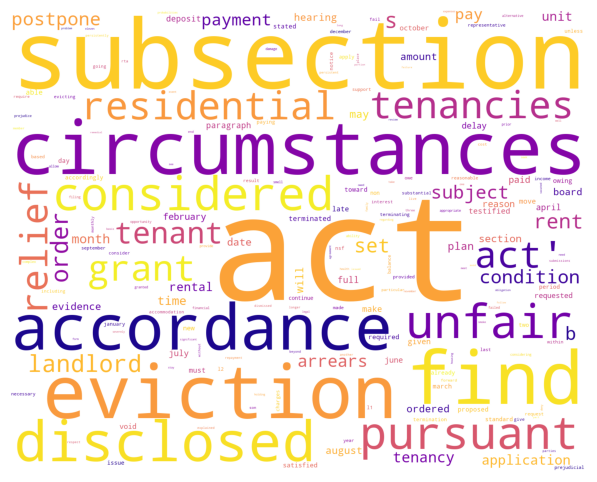

In [148]:
all_outcomes_str = ""
for test_row in gold_df.index:
    test_str = " ".join(gold_df.loc[test_row, 'content'])
    cospan = get_outcome_span(test_str, return_truncated = True)
    if cospan:
        all_outcomes_str += cospan.lower().strip() + " "

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1500, height = 1200, random_state = 1, background_color = 'white', colormap = 'plasma', collocations = False, stopwords = STOPWORDS).generate(all_outcomes_str)
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud)
plt.axis("off");

# Writing to new df

In [ ]:
# gold_df.value_counts('new_case_outcome')
# gold_df_reduced = gold_df.drop(columns = [col for col in gold_df.columns if col not in ["new_case_outcome", "raw_file_name", 'content']])
# # gold_df_reduced['outcome_span'] = gold_df_reduced['content'].apply(get_outcome_span)

# for row in gold_df.index:
#     content = " ".join(gold_df.loc[row, 'content'])
#     outcome_span = get_outcome_span(content)
#     gold_df_reduced.loc[row, 'outcome_span'] = outcome_span
# # 'data/outcome_extraction_testing.csv'
# len(gold_df_reduced['outcome_span'].unique()) # only 265 unique outcomes spans out of 672?

# gold_df_reduced.head()

,raw_file_name,content,new_case_outcome,outcome_span
0,CEL-62600-16.txt,[Arrears Worksheet File Number: CEL-62600-16 T...,No relief,No circumstances were disclosed in accordance ...
1,CEL-62852-16.txt,[Arrears Worksheet File Number: CEL-62852-16 T...,Relief,I have considered all of the disclosed circums...
2,CEL-63024-16.txt,[Arrears Worksheet File Number: CEL-63024-16 T...,Relief,I have considered all of the disclosed circums...
3,CEL-63056-16.txt,[Arrears Worksheet File Number: CEL-63056-16 T...,No relief,I have considered all of the disclosed circums...
4,CEL-63193-16.txt,[Arrears Worksheet File Number: CEL-63193-16 T...,No relief,I have considered all of the disclosed circums...


# Testing on all Cases

In [ ]:
# read in all 44k cases here
# all_cases = pd.read_csv("/Users/kmaurinjones/Desktop/School/UBC/UBC_Coursework/capstone/Allard_A_Capstone/large_files/44k_cases_pproc_filenums.csv")
all_cases = read_csv_with_lists("/Users/kmaurinjones/Desktop/School/UBC/UBC_Coursework/capstone/Allard_A_Capstone/large_files/44k_cases_pproc_filenums.csv")
all_cases.head()

,year,raw_file_name,raw_file_text,full_cleaned,metadata,content,language,case_citation,file_number
0,2013,NOL-10723-12.txt,Metadata:\nDate:\t2013-01-08\nFile number:\t\n...,"[Metadata:, Date: 2013-01-08, File number:, NO...","[Date: 2013-01-08, File number:, NOL-10723-12,...","[Order under Section 69, Residential Tenancies...",English,"NOL-10723-12 (Re), 2013 CanLII 5182 (ON LTB)",NOL-10723-12
1,2013,TNL-43964-13.txt,Metadata:\nDate:\t2013-05-02\nFile number:\t\n...,"[Metadata:, Date: 2013-05-02, File number:, TN...","[Date: 2013-05-02, File number:, TNL-43964-13,...",[Order under section 69 Residential Tenancies ...,English,"TNL-43964-13 (Re), 2013 CanLII 36866 (ON LTB)",TNL-43964-13
2,2013,TNL-45470-13.txt,Metadata:\nDate:\t2013-06-17\nFile number:\t\n...,"[Metadata:, Date: 2013-06-17, File number:, TN...","[Date: 2013-06-17, File number:, TNL-45470-13,...",[Order under Section 69 Residential Tenancies ...,English,"TNL-45470-13 (Re), 2013 CanLII 44492 (ON LTB)",TNL-45470-13
3,2013,TEL-33159-13; \n TET-33272-13.txt,Metadata:\nDate:\t2013-02-25\nFile number:\t\n...,"[Metadata:, Date: 2013-02-25, File number:, TE...","[Date: 2013-02-25, File number:, TEL-33159-13;...",[Order under sections 31 and 69 Residential Te...,English,"TEL-33159-13 (Re), 2013 CanLII 50418 (ON LTB)",TEL-33159-13; TET-33272-13
4,2013,TNL-39747-12.txt,Metadata:\nDate:\t2013-02-07\nFile number:\t\n...,"[Metadata:, Date: 2013-02-07, File number:, TN...","[Date: 2013-02-07, File number:, TNL-39747-12,...",[Order under Section 68 Residential Tenancies ...,English,"TNL-39747-12 (Re), 2013 CanLII 10834 (ON LTB)",TNL-39747-12


In [ ]:
total_found = 0
not_found = []
oc_lens = []

for row in all_cases.index: # 106 throws indexerror
    # print(row)

    # row = 108
    content_str = " ".join(all_cases.loc[row, 'content'])
    # content_str = " ".join(content_list) # only if the content is a list
    # print(gold_df['new_case_outcome'].tolist()[row])
    
    try:
        
        oc_statement = get_outcome_span(content_str)
        # print(oc_statement)
        if oc_statement:
            total_found += 1
            oc_lens.append(len(oc_statement.split()))
        else:
            not_found.append(row)

    except Exception:
        not_found.append(row) # error analysis

print(total_found / len(all_cases.index))
print(len(all_cases))
print(len(not_found))
print(not_found)
print()
print(max(oc_lens))
print(sum(oc_lens) / len(oc_lens)) # average of 61 words per extracted outcome span
print(sorted(oc_lens)[len(oc_lens) // 2]) # median of 60 words per extracted outcome span

0.9966588859902055
43698
146
[55, 101, 102, 196, 352, 357, 480, 502, 518, 616, 643, 791, 908, 928, 1002, 1010, 1014, 1105, 1210, 1271, 1345, 1383, 1428, 2963, 4760, 5813, 6561, 7015, 7302, 7488, 7734, 7957, 8010, 8132, 8259, 8445, 8698, 8714, 8807, 8913, 9409, 9735, 9775, 10048, 10062, 10104, 10118, 10150, 10372, 10380, 10389, 10414, 10565, 10683, 10777, 10814, 10818, 10853, 10884, 10894, 10955, 11000, 11122, 11177, 11370, 11577, 12806, 14331, 14423, 14472, 14548, 14562, 14695, 14995, 15084, 15292, 15305, 15346, 15469, 15496, 15572, 15588, 15690, 15714, 15779, 16025, 16269, 17547, 17729, 18091, 18444, 18627, 18787, 19031, 19467, 19560, 19981, 19984, 20291, 21274, 21941, 22065, 22580, 22668, 24306, 25532, 25919, 26420, 26456, 26962, 27910, 28101, 28572, 29065, 29123, 29688, 30054, 30135, 31009, 31257, 31300, 31866, 32330, 33326, 33650, 34362, 35307, 36007, 36875, 36972, 37002, 37409, 37670, 37698, 38370, 38903, 40527, 40598, 40669, 40843, 40997, 41146, 41361, 41811, 42131, 42405]

209
5

# Error Analysis -- Longformer next?
- Could probably use Longformer for the cases where the span can't be extracted using the rule-based approach

In [ ]:
row = 105
total_len = []
for row in not_found:

    content_str = " ".join(all_cases.loc[row, 'content'])
    
    # metadata = " ".join(all_cases.loc[row, 'metadata'])
    # print((row, re.findall(r'<(.*?)>', metadata)[0])) # url

    # print(len(get_outcome_span(content_str).split()))
    # print(len(content_str.split())) # number of words in the case file
    total_len.append(len(content_str.split()))
    # print(get_outcome_span(content_str))
    # break

print()
print(max(total_len)) # average number of words in a case file that doesn't have an outcome statement
print(sum(total_len) / len(not_found)) # average number of words in a case file that doesn't have an outcome statement
print(sorted(total_len)[len(total_len) // 2]) # median


2878
310.1986301369863
182


In [ ]:
total_len.index(max(total_len))
# not_found[66]

69